# Naïve Bayes

We start by creating a data frame containing the game data. 

In [1]:
Outlook = ["Sunny", "Sunny", "Overcast", "Rainy", "Rainy", "Rainy", "Overcast", "Sunny", "Sunny", "Rainy", "Sunny", "Overcast", "Overcast", "Rainy"]
Temp = ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"]
Humidity = ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"]
Windy = ["False", "True", "False", "False", "False", "True", "True", "False", "False", "False", "True", "True", "False", "True"]
Play = ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
import pandas as pd
play_df = pd.DataFrame({'Outlook':Outlook, 'Temp':Temp, 'Humidity':Humidity, 'Windy':Windy})

# add the Play column separately so that it appears last (otherwise Pandas will arrange the columns in alphabetical order)
play_df['Play'] = Play
play_df

Outlook  Temp Humidity  Windy Play
0      Sunny   Hot     High  False   No
1      Sunny   Hot     High   True   No
2   Overcast   Hot     High  False  Yes
3      Rainy  Mild     High  False  Yes
4      Rainy  Cool   Normal  False  Yes
5      Rainy  Cool   Normal   True   No
6   Overcast  Cool   Normal   True  Yes
7      Sunny  Mild     High  False   No
8      Sunny  Cool   Normal  False  Yes
9      Rainy  Mild   Normal  False  Yes
10     Sunny  Mild   Normal   True  Yes
11  Overcast  Mild     High   True  Yes
12  Overcast   Hot   Normal  False  Yes
13     Rainy  Mild     High   True   No

## Categorical Naïve Bayes

### Building the model

We import the CategoricalNB class, which implements the categorical Naïve Bayes model.

In [2]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder

We first need to create a dataframe with only the predictor attributes and encode those as required by the categorical NB class in sklearn (for each attribute, each category needs to be a number between 0 and n-1, where n is the number of categories i.e. possible values). Note that this encoding is meaningless with respect to magnitude (a 2 is not 'bigger than' a 1, they are all just labels).

In [3]:
play_x_df = play_df[play_df.columns[:-1]]

oen = OrdinalEncoder()
oen.fit(play_x_df)
play_x_encoded = oen.transform(play_x_df)
play_x_encoded

array([[2., 1., 0., 0.],
       [2., 1., 0., 1.],
       [0., 1., 0., 0.],
       [1., 2., 0., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 1.],
       [0., 0., 1., 1.],
       [2., 2., 0., 0.],
       [2., 0., 1., 0.],
       [1., 2., 1., 0.],
       [2., 2., 1., 1.],
       [0., 2., 0., 1.],
       [0., 1., 1., 0.],
       [1., 2., 0., 1.]])

We create a categorical Naïve Bayes model object named `cnb`, of the class CategoricalNB, defined in the SciKit Learn package. The named argument alpha=0.001 is the additive smoothing parameter, used to deal with zero-probabilities in the model, otherwise caused by some attribute values not being present in the data set, in spite of being valid values. Alpha is chosen to be negligible by comparison to the positive counts in the data set.

In [4]:
cnb = CategoricalNB(alpha=0.001)
cnb.fit(play_x_encoded, play_df.Play)

CategoricalNB(alpha=0.001)

At this stage, `cnb` contains the fitted model and we can use it for prediction. We pass in the predictor attribute data used to train the model and get the model to predict the target values, to see how well it can deduce the target values from the inputs and its own 'learned' knowledge i.e. the model.

We place the values predicted by the model into a variable called `predicted`.

In [5]:
predicted = cnb.predict(play_x_encoded)
predicted

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype='<U3')

The Naïve Bayes model can also output probabilities, instead of categories. The probabilities are what it calculates anyway, using them to perform the classification by identifying the most probable class. Here we make a special call that gives us the probabilities i.e. the output of the step before classification.

In [6]:
predicted_probabilities = cnb.predict_proba(play_x_encoded)
predicted_probabilities

array([[7.95286286e-01, 2.04713714e-01],
       [9.20953171e-01, 7.90468291e-02],
       [6.47005565e-04, 9.99352994e-01],
       [4.63464081e-01, 5.36535919e-01],
       [6.72337801e-02, 9.32766220e-01],
       [1.77745131e-01, 8.22254869e-01],
       [8.10226464e-05, 9.99918977e-01],
       [6.60201523e-01, 3.39798477e-01],
       [1.39508071e-01, 8.60491929e-01],
       [9.75339976e-02, 9.02466002e-01],
       [4.21637738e-01, 5.78362262e-01],
       [9.70113737e-04, 9.99029886e-01],
       [8.09956725e-05, 9.99919004e-01],
       [7.21491987e-01, 2.78508013e-01]])

### Calculating the accuracy and confusion matrix

We can find the correctly predicted target attribute values by comparing the predictions with the actual values. The expression `play_df.Play == predicted` is used to select the target attribute values that were correctly predicted.

In [7]:
correctly_predicted = play_df.Play[play_df.Play == predicted]
correctly_predicted

0      No
1      No
2     Yes
3     Yes
4     Yes
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play, dtype: object

The accuracy is the proportion of target attribute values that were correctly predicted. Now we calculate it.

In [8]:
accuracy = len(correctly_predicted)/len(predicted)
accuracy

0.9285714285714286

Now we have a look at a **baseline model** against which we can compare our model's prediction accuracy. A baseline model is one that is simple, straightforward and cost-effective. One such model is **majority prediction** which simply always predicts the mode of the target attribute value set (i.e. the most frequent value). In our target attribute value set, the value **Yes** appears 9 times and the value **No** appears 5 times. The majority prediction model would predict **Yes** for all instances and would end up correct in 9 out of 14 cases. Here we calculate the majority prediction accuracy.

In [9]:
majority_prediction_accuracy = 9/14
majority_prediction_accuracy

0.6428571428571429

Is the NB model's accuracy better than majority prediction accuracy? Yes. So we can say that in that particular way and for this particular set the NB model is better.

In [10]:
accuracy > majority_prediction_accuracy

True

Now we create a cross-table of predicted and actual values, called a **confusion matrix**. It provides more information than accuracy, consisting in this case of 4 numbers:

- true positive count (the number of cases that actually have the value **Yes** and were predicted as **Yes**: 9)
- false positive count (the number of cases that actually have the value **No** but were predicted as **Yes**: 1)
- false negative count (the number of cases that actually have the value **Yes** but were predicted as **No**: 0)
- true negative count (the number of cases that actually have the value **No** and were predicted as **No**: 4)

Note that **No** could just as well have been chosen as the *positive* value. *Positive* is a term used because models are often *detecting* something, for example whether a patient is likely to have a disease based on their symptoms.

In [11]:
confusion_matrix = pd.crosstab(play_df.Play, predicted, rownames=["Played"], colnames=["Predicted"])
confusion_matrix

Predicted  No  Yes
Played            
No          4    1
Yes         0    9

### Including cross-validation

In this part we repeat the exercise of building and testing a model but this time we use one portion of the data set (training data) to build the model and another portion (test data) to test it. 

We use a function called `test_train_split` to split our data into a group of instances for training and another group for testing. The function takes a dataframe (containing predictor attribute values) and a series (containing the target attribute values) and splits them, randomly choosing a certain number of instances to set aside for testing. The number is determined from the value passed in for the `test_size` parameter (in the example below it is 0.5, meaning half of all the instances).

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(play_x_encoded, play_df.Play, test_size=0.5)
print(X_train, "\n\n", X_test)
print("\n")
print(y_train, "\n\n", y_test)

[[1. 0. 1. 1.]
 [0. 0. 1. 1.]
 [0. 2. 0. 1.]
 [1. 2. 0. 0.]
 [2. 2. 1. 1.]
 [1. 2. 0. 1.]
 [2. 1. 0. 1.]] 

 [[2. 2. 0. 0.]
 [1. 0. 1. 0.]
 [2. 0. 1. 0.]
 [1. 2. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 1. 0.]
 [2. 1. 0. 0.]]


5      No
6     Yes
11    Yes
3     Yes
10    Yes
13     No
1      No
Name: Play, dtype: object 

 7      No
4     Yes
8     Yes
9     Yes
2     Yes
12    Yes
0      No
Name: Play, dtype: object


Now repeat all the steps from above to build and test the model, but with the training and testing set:

In [13]:
cnbtt = CategoricalNB(alpha=0.001)
cnbtt.fit(X_train, y_train)

CategoricalNB(alpha=0.001)

In [14]:
predictedtt = cnbtt.predict(X_test)
predictedtt

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No'], dtype='<U3')

In [15]:
correctly_predictedtt = y_test[y_test == predictedtt]
correctly_predictedtt

4     Yes
8     Yes
9     Yes
2     Yes
12    Yes
0      No
Name: Play, dtype: object

In [16]:
accuracytt = len(correctly_predictedtt)/len(predictedtt)
accuracytt

0.8571428571428571

In [17]:
accuracytt > majority_prediction_accuracy

True

In [18]:
confusion_matrix = pd.crosstab(y_test, predictedtt, rownames=["Played"], colnames=["Predicted"])
confusion_matrix

Predicted  No  Yes
Played            
No          1    1
Yes         0    5

The accuracy of this model appears to be much worse, but that is because we are testing on data that has not been used for training.


## Gaussian Naïve Bayes 

This type of model is used when predicting a class from normally distributed numeric variables.

In our example the class is the iris Species and the predictor attributes are the sepal and petal dimensions (4 in all).

In [19]:
# get the data
iris = pd.read_csv("iris.csv", index_col=0)
iris.head(10)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1            5.1          3.5           1.4          0.2  setosa
2            4.9          3.0           1.4          0.2  setosa
3            4.7          3.2           1.3          0.2  setosa
4            4.6          3.1           1.5          0.2  setosa
5            5.0          3.6           1.4          0.2  setosa
6            5.4          3.9           1.7          0.4  setosa
7            4.6          3.4           1.4          0.3  setosa
8            5.0          3.4           1.5          0.2  setosa
9            4.4          2.9           1.4          0.2  setosa
10           4.9          3.1           1.5          0.1  setosa

GaussianNB, a class found in the SciKit Learn package, implements the Gaussian Naïve Bayes model. We create an object of this class.

In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

We create train and test subsets of the iris dataset. 

*iris.iloc[:,:-1]* extracts all the columns except the last, containing the numeric attributes (serving as predictor attributes in our model)

*iris['Species']* extracts the column, which will be the target attribute

In [21]:
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris.iloc[:,:-1], iris['Species'], test_size=0.5)
iris_X_train.head(10)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
106           7.6          3.0           6.6          2.1
107           4.9          2.5           4.5          1.7
2             4.9          3.0           1.4          0.2
20            5.1          3.8           1.5          0.3
55            6.5          2.8           4.6          1.5
82            5.5          2.4           3.7          1.0
133           6.4          2.8           5.6          2.2
102           5.8          2.7           5.1          1.9
22            5.1          3.7           1.5          0.4
64            6.1          2.9           4.7          1.4

The following line trains the model.

In [22]:
gnb.fit(iris_X_train, iris_y_train)

GaussianNB()

Now we predict the target variable for the test data subset, passing in the predictor attribute values of the test subset.

In [23]:
iris_pred = gnb.predict(iris_X_test)
iris_pred

array(['setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'virginica', 'setosa', 'virginica', 'virginica',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica', 'setosa', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'versicolor',
       'virginica', 'versicolor

We calculate the accuracy in the same way as before.        

In [24]:
iris_accuracy = len(iris_y_test[iris_y_test == iris_pred])/len(iris_pred)
iris_accuracy

0.9733333333333334

We create the confusion matrix, which in this case has three columns and three rows since the target attribute has three possible values (in other words, the instances of the data set can belong to one of three different classes).

In [25]:
pd.crosstab(iris_y_test, iris_pred, rownames=["Actual"], colnames=["Predicted"])

Predicted   setosa  versicolor  virginica
Actual                                   
setosa          28           0          0
versicolor       0          19          1
virginica        0           1         26

## Mixed Naïve Bayes 

Mixed Naïve Bayes (which predicts based on a combination of categorical and numeric variables) is not implemented in ScikitLearn at the moment. This may change (e.g. categorical NB has been added to it only in 2020), but in the meantime we can use a different package available from https://github.com/remykarem/mixed-naive-bayes. The package follows the naming patterns of Scikit Learn and is not difficult to use.

To install the package to Anaconda, run Anaconda Prompt and in the window that opens run the installation instructions given in the package documentation on GitHub.

# Classification Tree

A classification tree can be used with categorical and numeric attributes. In the case of numeric attributes, the fitting function uses splitting criteria to split the numeric range into sub-ranges to act as categories.

## Classification tree example with categorical attributes

The Scikit Learn classification tree fitting function does not work on categorical attributes and we have to use the dummy (one-hot) encoded data. The encoding results in a variable for every possible categorical value becoming a variable, with values 0 and 1. The tree interprets these values as numeric, splitting the range [0,1] back into categories 0 and 1. 

The model fitting and evaluation steps are the same as in the Naïve Bayes example.

### Building the model and predicting

In [26]:
play_dummies_df = pd.concat([play_df.Humidity.str.get_dummies(), 
                             play_df.Outlook.str.get_dummies(),
                             play_df.Temp.str.get_dummies(),
                             play_df.Windy.str.get_dummies()], axis=1)
play_dummies_df


High  Normal  Overcast  Rainy  Sunny  Cool  Hot  Mild  False  True
0      1       0         0      0      1     0    1     0      1     0
1      1       0         0      0      1     0    1     0      0     1
2      1       0         1      0      0     0    1     0      1     0
3      1       0         0      1      0     0    0     1      1     0
4      0       1         0      1      0     1    0     0      1     0
5      0       1         0      1      0     1    0     0      0     1
6      0       1         1      0      0     1    0     0      0     1
7      1       0         0      0      1     0    0     1      1     0
8      0       1         0      0      1     1    0     0      1     0
9      0       1         0      1      0     0    0     1      1     0
10     0       1         0      0      1     0    0     1      0     1
11     1       0         1      0      0     0    0     1      0     1
12     0       1         1      0      0     0    1     0      1     0
13     1       0         0      1      0     0    0     1      0     1

In [27]:
from sklearn import tree
classtree_ca = tree.DecisionTreeClassifier()
classtree_ca.fit(play_dummies_df, play_df.Play)

DecisionTreeClassifier()

In [28]:
predicted_ca = classtree_ca.predict(play_dummies_df)
predicted_ca

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

### Calculating the accuracy and confusion matrix

In [29]:
correctly_predicted = play_df.Play[play_df.Play == predicted]
correctly_predicted

0      No
1      No
2     Yes
3     Yes
4     Yes
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play, dtype: object

In [30]:
accuracy = len(correctly_predicted)/len(predicted)
accuracy

0.9285714285714286

In [31]:
majority_prediction_accuracy = 9/14
majority_prediction_accuracy

0.6428571428571429

In [32]:
accuracy > majority_prediction_accuracy

True

In [33]:
confusion_matrix = pd.crosstab(play_df.Play, predicted, rownames=["Played"], colnames=["Predicted"])
confusion_matrix

Predicted  No  Yes
Played            
No          4    1
Yes         0    9

## Including cross-validation

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(play_dummies_df, play_df.Play, test_size=0.5)
print(X_train, "\n\n", X_test)

    High  Normal  Overcast  Rainy  Sunny  Cool  Hot  Mild  False  True
5      0       1         0      1      0     1    0     0      0     1
11     1       0         1      0      0     0    0     1      0     1
4      0       1         0      1      0     1    0     0      1     0
8      0       1         0      0      1     1    0     0      1     0
1      1       0         0      0      1     0    1     0      0     1
7      1       0         0      0      1     0    0     1      1     0
2      1       0         1      0      0     0    1     0      1     0 

     High  Normal  Overcast  Rainy  Sunny  Cool  Hot  Mild  False  True
12     0       1         1      0      0     0    1     0      1     0
3      1       0         0      1      0     0    0     1      1     0
0      1       0         0      0      1     0    1     0      1     0
6      0       1         1      0      0     1    0     0      0     1
9      0       1         0      1      0     0    0     1      1     0
13 

Now repeat all the steps from above, but with the training and testing set:

In [35]:
cttt_ca = tree.DecisionTreeClassifier()
cttt_ca.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
predictedtt = cttt_ca.predict(X_test)
predictedtt

array(['Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No'], dtype=object)

In [37]:
correctly_predictedtt = y_test[y_test == predictedtt]
correctly_predictedtt

12    Yes
0      No
6     Yes
9     Yes
13     No
Name: Play, dtype: object

In [38]:
accuracytt = len(correctly_predictedtt)/len(predictedtt)
accuracytt

0.7142857142857143

In [39]:
accuracytt > majority_prediction_accuracy

True

In [40]:
confusion_matrix = pd.crosstab(y_test, predictedtt, rownames=["Played"], colnames=["Predicted"])
confusion_matrix

Predicted  No  Yes
Played            
No          2    0
Yes         2    3

## Classification tree example with numeric attributes

This example uses the iris dataset. We split it into subsets for training and testing. See the Scikit Learn documentation (https://scikit-learn.org/stable/modules/tree.html) for some nice classification tree visualisations. 

The model fitting and evaluation steps are the same as in the Naïve Bayes example. 

In [41]:
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris.iloc[:,:-1], iris['Species'], test_size=0.5)
iris_X_train.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
99           5.1          2.5           3.0          1.1
46           4.8          3.0           1.4          0.3
92           6.1          3.0           4.6          1.4
94           5.0          2.3           3.3          1.0
95           5.6          2.7           4.2          1.3

In [42]:
cttt_na = tree.DecisionTreeClassifier()
cttt_na.fit(iris_X_train, iris_y_train)

DecisionTreeClassifier()

In [43]:
iris_pred = cttt_na.predict(iris_X_test)
iris_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'setosa',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', '

In [44]:
iris_accuracy = len(iris_y_test[iris_y_test == iris_pred])/len(iris_pred)
iris_accuracy

0.9333333333333333

In [45]:
pd.crosstab(iris_y_test, iris_pred, rownames=["Actual"], colnames=["Predicted"])

Predicted   setosa  versicolor  virginica
Actual                                   
setosa          27           0          0
versicolor       0          20          2
virginica        0           3         23

## Classification tree example with a mix of numeric and categorical variables

The categorical variables are dummy (one-hot) encoded but otherwise the tree is used in the same way as purely numeric or purely categorical predictor sets.

In [46]:
Outlook = ["Sunny", "Sunny", "Overcast", "Rainy", "Rainy", "Rainy", "Overcast", "Sunny", "Sunny", "Rainy", "Sunny", "Overcast", "Overcast", "Rainy"]
Temp = [27, 25, 28, 15, 9, 8, 7, 12, 9, 17, 15, 15, 22, 19]
Humidity = ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"]
Windy = ["False", "True", "False", "False", "False", "True", "True", "False", "False", "False", "True", "True", "False", "True"]
Play = ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
import pandas as pd
play_df = pd.DataFrame({'Outlook':Outlook, 'Temp':Temp, 'Humidity':Humidity, 'Windy':Windy})
# add the Play column separately so that it appears last (otherwise Pandas will arrange the columns in alphabetical order)
play_df['Play'] = Play
play_df

Outlook  Temp Humidity  Windy Play
0      Sunny    27     High  False   No
1      Sunny    25     High   True   No
2   Overcast    28     High  False  Yes
3      Rainy    15     High  False  Yes
4      Rainy     9   Normal  False  Yes
5      Rainy     8   Normal   True   No
6   Overcast     7   Normal   True  Yes
7      Sunny    12     High  False   No
8      Sunny     9   Normal  False  Yes
9      Rainy    17   Normal  False  Yes
10     Sunny    15   Normal   True  Yes
11  Overcast    15     High   True  Yes
12  Overcast    22   Normal  False  Yes
13     Rainy    19     High   True   No

One-hot encoding of the categorical variables

In [47]:
play_dummy_num_df = pd.concat([play_df.Outlook.str.get_dummies(), 
                               play_df[['Temp']],
                               play_df.Humidity.str.get_dummies(),
                               play_df.Windy.str.get_dummies()], axis=1)
play_dummy_num_df

Overcast  Rainy  Sunny  Temp  High  Normal  False  True
0          0      0      1    27     1       0      1     0
1          0      0      1    25     1       0      0     1
2          1      0      0    28     1       0      1     0
3          0      1      0    15     1       0      1     0
4          0      1      0     9     0       1      1     0
5          0      1      0     8     0       1      0     1
6          1      0      0     7     0       1      0     1
7          0      0      1    12     1       0      1     0
8          0      0      1     9     0       1      1     0
9          0      1      0    17     0       1      1     0
10         0      0      1    15     0       1      0     1
11         1      0      0    15     1       0      0     1
12         1      0      0    22     0       1      1     0
13         0      1      0    19     1       0      0     1

In [48]:
classtree_cna = tree.DecisionTreeClassifier()
classtree_cna.fit(play_dummy_num_df, play_df.Play)

DecisionTreeClassifier()

In [49]:
predicted_cna = classtree_cna.predict(play_dummy_num_df)
predicted_cna

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

As a last little exercise we will compare the result from the classification with categorical temperature values and this one.

In [50]:
import numpy as np
np.count_nonzero(predicted_ca != predicted_cna)

0

# Regression Tree

A regression tree can be used with categorical and numeric attributes. In the case of numeric attributes, the fitting function uses splitting criteria to split the numeric range into sub-ranges to act as categories.

In [51]:
auto_df = pd.read_csv("Auto.csv", index_col=0)
auto_df.head(10)

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
1   18.0          8         307.0         130    3504          12.0    70   
2   15.0          8         350.0         165    3693          11.5    70   
3   18.0          8         318.0         150    3436          11.0    70   
4   16.0          8         304.0         150    3433          12.0    70   
5   17.0          8         302.0         140    3449          10.5    70   
6   15.0          8         429.0         198    4341          10.0    70   
7   14.0          8         454.0         220    4354           9.0    70   
8   14.0          8         440.0         215    4312           8.5    70   
9   14.0          8         455.0         225    4425          10.0    70   
10  15.0          8         390.0         190    3850           8.5    70   

    origin                       name  
1        1  chevrolet chevelle malibu  
2        1          buick skylark 320  
3        1         plymouth satellite  
4        1              amc rebel sst  
5        1                ford torino  
6        1           ford galaxie 500  
7        1           chevrolet impala  
8        1          plymouth fury iii  
9        1           pontiac catalina  
10       1         amc ambassador dpl

Prepare a data frame with only the predictor attributes.

In [52]:
auto_x_df = auto_df[auto_df.columns[:-3]]
auto_x_df

mpg  cylinders  displacement  horsepower  weight  acceleration
1    18.0          8         307.0         130    3504          12.0
2    15.0          8         350.0         165    3693          11.5
3    18.0          8         318.0         150    3436          11.0
4    16.0          8         304.0         150    3433          12.0
5    17.0          8         302.0         140    3449          10.5
..    ...        ...           ...         ...     ...           ...
393  27.0          4         140.0          86    2790          15.6
394  44.0          4          97.0          52    2130          24.6
395  32.0          4         135.0          84    2295          11.6
396  28.0          4         120.0          79    2625          18.6
397  31.0          4         119.0          82    2720          19.4

[392 rows x 6 columns]

Create, fit and predict with the regression tree.

In [53]:
regtree_na = tree.DecisionTreeRegressor()
regtree_na.fit(auto_x_df, auto_df['year'])
predicted_year = regtree_na.predict(auto_x_df)
predicted_year

array([70. , 70. , 70. , 70. , 70. , 70. , 70. , 70. , 70. , 70. , 70. ,
       70. , 70. , 70. , 70. , 70. , 70. , 70. , 70.5, 70. , 70. , 70. ,
       70. , 70. , 70. , 70. , 70. , 70. , 70. , 70.5, 71. , 71. , 71. ,
       71. , 71. , 71. , 71. , 71. , 71. , 71. , 71. , 71. , 71. , 71. ,
       71. , 71. , 71. , 71. , 71. , 71. , 71. , 71. , 71. , 71. , 71. ,
       71. , 72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. ,
       72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. ,
       72. , 72. , 72. , 72. , 72. , 72. , 72. , 73. , 73. , 73. , 73. ,
       73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. ,
       73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. ,
       73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. ,
       73. , 73. , 73. , 74. , 74. , 74. , 74. , 74. , 74. , 74. , 74. ,
       74. , 74. , 74. , 74. , 74. , 74. , 74. , 74. , 74. , 74. , 74. ,
       74. , 74. , 74. , 74. , 74. , 74. , 74. , 75

Find the rooted mean squared error.

In [54]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(auto_df['year'], predicted_year, squared=False)
rmse

0.03571428571428571

The RMSE value is very good, but it could indicate an overfitted tree. Let's first check how the model fares if we use a train/test split.

In [55]:
auto_X_trn, auto_X_tst, auto_y_trn, auto_y_tst = train_test_split(auto_x_df, auto_df['year'], test_size=0.5)
regtree_na_tt = tree.DecisionTreeRegressor()
regtree_na_tt.fit(auto_X_trn, auto_y_trn)
predicted_year_tt = regtree_na_tt.predict(auto_X_tst)
predicted_year_tt

array([73. , 82. , 71. , 76. , 78. , 76. , 72. , 75. , 77. , 80. , 71. ,
       77. , 76. , 73. , 77. , 73. , 81. , 77. , 72. , 72. , 73. , 72. ,
       80. , 78. , 76. , 73. , 71. , 80. , 74. , 79. , 73. , 79. , 75. ,
       80. , 80. , 70. , 81. , 70. , 76. , 79. , 72. , 82. , 82. , 79. ,
       74. , 72. , 82. , 71. , 79. , 72. , 77. , 74. , 81. , 82. , 80. ,
       70. , 77. , 82. , 72. , 82. , 73. , 82. , 81. , 71. , 82. , 75. ,
       80. , 72. , 70. , 82. , 70.5, 76. , 73. , 81. , 82. , 76. , 74. ,
       71. , 72. , 74. , 77. , 72. , 70. , 80. , 70. , 72. , 81. , 70. ,
       73. , 80. , 74. , 73. , 74. , 71. , 75. , 80. , 71. , 76. , 72. ,
       79. , 74. , 75. , 76. , 81. , 76. , 75. , 75. , 72. , 74. , 81. ,
       74. , 70. , 75. , 82. , 72. , 82. , 81. , 70. , 73. , 81. , 80. ,
       79. , 76. , 70. , 79. , 76. , 73. , 72. , 72. , 77. , 81. , 81. ,
       73. , 70. , 74. , 81. , 70. , 72. , 70.5, 70. , 78. , 82. , 82. ,
       76. , 82. , 70. , 82. , 82. , 82. , 77. , 79

In [56]:
rmse_tt = mean_squared_error(auto_y_tst, predicted_year_tt, squared=False)
rmse_tt

3.378729987218661

In [57]:
predicted_year_tr = regtree_na_tt.predict(auto_X_trn)
rmse_tr = mean_squared_error(auto_y_trn, predicted_year_tr, squared=False)
rmse_tr

0.050507627227610534

To **avoid overfitting**, we can try a shallower tree.

In [58]:
regtree_na_tt.feature_importances_

array([0.4241174 , 0.00098999, 0.09354424, 0.13402034, 0.24301919,
       0.10430885])

In [59]:
regtree_na_sh = tree.DecisionTreeRegressor(max_depth=1)
regtree_na_sh.fit(auto_X_trn, auto_y_trn)
predicted_year_sh = regtree_na_sh.predict(auto_X_tst)
predicted_year_sh

array([75.01398601, 78.90566038, 75.01398601, 75.01398601, 75.01398601,
       75.01398601, 75.01398601, 75.01398601, 78.90566038, 78.90566038,
       75.01398601, 78.90566038, 75.01398601, 75.01398601, 78.90566038,
       75.01398601, 75.01398601, 75.01398601, 75.01398601, 75.01398601,
       75.01398601, 75.01398601, 75.01398601, 75.01398601, 75.01398601,
       75.01398601, 75.01398601, 78.90566038, 75.01398601, 75.01398601,
       75.01398601, 75.01398601, 75.01398601, 78.90566038, 75.01398601,
       75.01398601, 78.90566038, 75.01398601, 75.01398601, 78.90566038,
       75.01398601, 78.90566038, 78.90566038, 75.01398601, 75.01398601,
       75.01398601, 75.01398601, 75.01398601, 75.01398601, 75.01398601,
       75.01398601, 75.01398601, 78.90566038, 78.90566038, 75.01398601,
       75.01398601, 78.90566038, 78.90566038, 75.01398601, 75.01398601,
       75.01398601, 78.90566038, 78.90566038, 75.01398601, 75.01398601,
       75.01398601, 78.90566038, 75.01398601, 75.01398601, 75.01

Why are the predicted values not whole numbers?

In [60]:
rmse_sh = mean_squared_error(auto_y_tst, predicted_year_sh, squared=False)
rmse_sh

3.128648592636255

To investigate further, we'll iterate through different depth values.

In [61]:
rmse_list = []
for i in range(1, 11):
    regtree_na_i = tree.DecisionTreeRegressor(max_depth=i)
    regtree_na_i.fit(auto_X_trn, auto_y_trn)
    predicted_year_i = regtree_na_i.predict(auto_X_tst)
    rmse_i = mean_squared_error(auto_y_tst, predicted_year_i, squared=False)
    rmse_list += [ rmse_i ]    

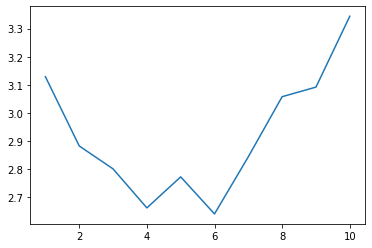

In [62]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), rmse_list)
plt.show()

# Linear Regression

The principle of fitting a regression model is the same as that for a classification model. The evaluation of the results is different as it uses the sum of squared errors (where the *error* is the difference between the predicted and real value) as a measure of model quality.

## Using one predictor variable

We split the iris data set into train and test sub-sets.

In [63]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
iris_X_train2, iris_X_test2, iris_y_train2, iris_y_test2 = train_test_split(iris.iloc[:,2:3], iris['Petal.Width'], test_size=0.5)

We fit the model. As with the other models, both the data frame with the predictor attribute training values and the target attribute training values are passed in.

In [64]:
regr.fit(iris_X_train2, iris_y_train2)

LinearRegression()

The prediction method is called in the usual way.

In [65]:
iris_pred2 = regr.predict(iris_X_test2)

The linear function coefficients can be read out of the model object after fitting and so can the measures of model quality. The mean square error is the sum of squared differences between the true and predicted values. The R squared score represents the proportion of the variability in the target values that can be 'explained' with the predictor attributes - it's a value between 0 and 1 and the greater it is, the better the model.

In [66]:
# The intercept
print('Intercept: \n', regr.intercept_)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(iris_y_test2, iris_pred2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(iris_y_test2, iris_pred2))


Intercept: 
 -0.3573283610276301
Coefficients: 
 [0.40769371]
Mean squared error: 0.05
Variance score: 0.93


Let's also plot the data and the line fitted by linear regression.

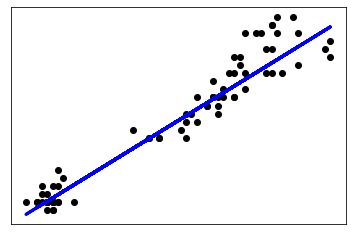

In [67]:
import matplotlib.pyplot as plt
plt.scatter(iris_X_test2, iris_y_test2,  color='black')
plt.plot(iris_X_test2, iris_pred2, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Using three predictor variables

We repeat the linear regression but using all the predictor attributes available (4 of them).

In [68]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
iris_X_train2, iris_X_test2, iris_y_train2, iris_y_test2 = train_test_split(iris.iloc[:,0:3], iris['Petal.Width'], test_size=0.5)

In [69]:
regr.fit(iris_X_train2, iris_y_train2)

LinearRegression()

In [70]:
iris_pred2 = regr.predict(iris_X_test2)

In [71]:
# The intercept
print('Intercept: \n', regr.intercept_)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(iris_y_test2, iris_pred2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(iris_y_test2, iris_pred2))


Intercept: 
 -0.22254723725405756
Coefficients: 
 [-0.1754633   0.18227538  0.49384482]
Mean squared error: 0.04
Variance score: 0.94


If you run the single-predictor attribute regression and the multiple-predictor-attribute regression several times, you will find that the R-squared value (variance score) is consistently somewhat better in the latter case, because of the additional predictive power contained in the additional attributes. However, in many contexts, the very small increase in quality would not justify using the more complex model (with 4 rather than 1 predictor attribute).